In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from utils.data import load_tc_data
from utils.plot import make_cmap
import cftime as cf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
from numpy import inf
from scipy.stats import gaussian_kde
import matplotlib.colors as mcolors
from scipy import stats
import matplotlib.pyplot as plt
import tropycal
from tropycal import tracks


In [2]:

inputs = np.load('/user/work/al18709/tc_data_flipped/KE_tracks/valid_X.npy')
training_inputs = np.load('/user/work/al18709/tc_data_flipped/KE_tracks/train_X.npy')


In [3]:
# for model in ['canesm','cnrm6','ecearth6','ipsl6','miroc6','mpi6','mri6','ukmo'][0]:
for model in ['BCC-CSM2-MR','CMCC-ESM2','EC-Earth3','IPSL-CM6A-LR','MIROC6','MPI-ESM1-2-LR','MRI-ESM2-0','NESM3','NorESM2-LM','TaiESM1']:
	if model == 'BCC-CSM2-MR':
		model_name = 'bcc'
	elif model == 'CMCC-ESM2':
		model_name = 'cmcc'
	elif model == 'EC-Earth3':
		model_name = 'ecearth'
	elif model == 'IPSL-CM6A-LR':
		model_name = 'ipsl'
	elif model == 'MIROC6':
		model_name = 'miroc'
	elif model == 'MPI-ESM1-2-LR':
		model_name = 'mpi'
	elif model == 'MRI-ESM2-0':
		model_name = 'mri'
	elif model == 'NESM3':
		model_name = 'nesm'
	elif model == 'NorESM2-LM':
		model_name = 'noresm'
	else:
		model_name = 'taiesm'
	
	for scenario in ['historical','ssp585']:
		df_nh = pd.DataFrame({'lat':[],'lon':[],'sid':[],'year':[],'wind_speed':[]})
		df_sh = pd.DataFrame({'lat':[],'lon':[],'sid':[],'year':[],'wind_speed':[]})
		# globals()[f'{model}_topography_{scenario}'] = np.load(f'/user/home/al18709/work/ke_track_inputs/{model}_{scenario}_topography.npy')
		print(model,scenario)
		print(model_name,scenario)
		if scenario == 'historical':
			yr1 = 1950
			yr2 = 2014
			years = range(2000,2014)
		elif scenario == 'ssp585':
			years = range(2085,2099)
		run = 'r1i1p1f1'

		for year in years:
			nh = xr.open_dataset(f'/user/home/al18709/work/CMIP6/{model}/tracks/{scenario}/NH/{model}_tracks_{run}_{year}_newtime2.nc',use_cftime=True)
			sh = xr.open_dataset(f'/user/home/al18709/work/CMIP6/{model}/tracks/{scenario}/SH/{model}_tracks_{run}_{year}{year+1}_newtime2.nc',use_cftime=True)

			storm_start = nh.FIRST_PT
			storm_duration = nh.NUM_PTS #first point?
			lats = nh.latitude
			lons = nh.longitude
			time = nh.time
			track_id = nh.TRACK_ID #num points?
			w_speed = nh.wind_speed_850
			sids = []
			for i,track in enumerate(track_id.values):
				list = [track] * int(storm_duration[i].values)
				for l in list:
					sids.append(l)
			
			sids_unique=track_id

			df = pd.DataFrame({'lat':lats,'lon':lons,'sid':sids,'year':time.dt.year,'wind_speed':w_speed})
			tracks_grouped = df.groupby('sid')
			nature = []
			for i,s in enumerate(track_id.values):
				storm = tracks_grouped.get_group(s)
				if np.all(storm.wind_speed < 41.25):
					list = ['TD'] * int(storm_duration[i].values)
					for l in list:
						nature.append(l)
				else:
					list = ['TS'] * int(storm_duration[i].values)
					for l in list:
						nature.append(l)
			
			df['nature'] = nature
			df_filtered_nh = df[df['nature'] == 'TS']
			df_nh = pd.concat([df_nh,df_filtered_nh])
			group_nh = df_nh.groupby('sid')
			

			storm_start = sh.FIRST_PT
			storm_duration = sh.NUM_PTS #first point?
			lats = sh.latitude
			lons = sh.longitude
			time = sh.time
			track_id = sh.TRACK_ID #num points?
			w_speed = sh.wind_speed_850
			sids = []
			for i,track in enumerate(track_id.values):
				# print(track)
				list = [track] * int(storm_duration[i].values)
				for l in list:
					sids.append(l)
			df = pd.DataFrame({'lat':lats,'lon':lons,'sid':sids,'year':time.dt.year,'wind_speed':w_speed})
			tracks_grouped = df.groupby('sid')
			nature = []
			for i,s in enumerate(track_id.values):
				storm = tracks_grouped.get_group(s)
				if np.all(storm.wind_speed < 41.25):
					list = ['TD'] * int(storm_duration[i].values)
					for l in list:
						nature.append(l)
				else:
					list = ['TS'] * int(storm_duration[i].values)
					for l in list:
						nature.append(l)
			
			df['nature'] = nature
			df_filtered_sh = df[df['nature'] == 'TS']
			df_sh = pd.concat([df_sh,df_filtered_sh])
			group_sh = df_sh.groupby('sid')

		globals()[f'{model_name}_tracks_{scenario}_nh'] = df_nh
		print(model_name,scenario,'number of storms nh',group_nh.ngroups)
		globals()[f'{model_name}_tracks_{scenario}_sh'] = df_sh
		print(model_name,scenario,'number of storms sh',group_sh.ngroups)
		



BCC-CSM2-MR historical
bcc historical
bcc historical number of storms nh 97
bcc historical number of storms sh 104
BCC-CSM2-MR ssp585
bcc ssp585
bcc ssp585 number of storms nh 89
bcc ssp585 number of storms sh 92
CMCC-ESM2 historical
cmcc historical
cmcc historical number of storms nh 49
cmcc historical number of storms sh 50
CMCC-ESM2 ssp585
cmcc ssp585
cmcc ssp585 number of storms nh 55
cmcc ssp585 number of storms sh 47
EC-Earth3 historical
ecearth historical
ecearth historical number of storms nh 36
ecearth historical number of storms sh 53
EC-Earth3 ssp585
ecearth ssp585
ecearth ssp585 number of storms nh 37
ecearth ssp585 number of storms sh 50
IPSL-CM6A-LR historical
ipsl historical
ipsl historical number of storms nh 55
ipsl historical number of storms sh 93
IPSL-CM6A-LR ssp585
ipsl ssp585
ipsl ssp585 number of storms nh 40
ipsl ssp585 number of storms sh 71
MIROC6 historical
miroc historical
miroc historical number of storms nh 71
miroc historical number of storms sh 86
MIROC6

In [4]:
# cmcc_tracks_historical_nh
['BCC-CSM2-MR','CMCC-ESM2','EC-Earth3','IPSL-CM6A-LR','MIROC6','MPI-ESM1-2-LR','MRI-ESM2-0','NESM3','NorESM2-LM','TaiESM1']
bcc_tracks_ssp585_sh

,lat,lon,sid,year,wind_speed,nature
112,-23.254749,200.883865,3.0,2085.0,10.405580,TS
113,-22.109455,198.948700,3.0,2085.0,9.384887,TS
114,-21.458294,198.663223,3.0,2085.0,7.733132,TS
115,-20.547003,197.461945,3.0,2085.0,8.366606,TS
116,-19.820045,195.212021,3.0,2085.0,9.241462,TS
...,...,...,...,...,...,...
3212,-43.017258,197.786179,70.0,2099.0,34.382179,TS
3213,-43.805275,201.428741,70.0,2099.0,31.261009,TS
3214,-44.637276,205.306839,70.0,2099.0,29.745939,TS
3215,-45.344852,209.479919,70.0,2099.0,29.657980,TS


In [5]:
binsize = 1
def to_bin(x): return np.floor(x / binsize) * binsize
def calc_track_density(storm_data,lonshift=False,mask=True):
    binsize = 1
    latbin = storm_data.lat.map(to_bin)
    lonbin = storm_data.lon.map(to_bin)
    new_df = pd.DataFrame({'latbin': latbin, 'lonbin': lonbin, 'stormid':storm_data.sid})
    new_new_df = new_df.drop_duplicates()
    if lonshift == True:
        lat_bins = np.arange(-90, 91, 1)
        lon_bins = np.arange(-180, 181, 1)
    else:
        lat_bins = np.arange(-90, 91, 1)
        lon_bins = np.arange(0, 361, 1)
    density, _, _ = np.histogram2d(new_new_df.latbin, new_new_df.lonbin, bins=[lat_bins, lon_bins])
    masked_density = np.ma.masked_equal(density, 0)
    if mask == True:
        return masked_density
    else:
        return density
def mask(data):
    return np.ma.masked_equal(data, 0)


In [6]:
# Compute histogram of cyclone tracks
['BCC-CSM2-MR','CMCC-ESM2','EC-Earth3','IPSL-CM6A-LR','MIROC6','MPI-ESM1-2-LR','MRI-ESM2-0','NESM3','NorESM2-LM','TaiESM1']
bcc_hist_masked_density_nh = calc_track_density(bcc_tracks_historical_nh[(bcc_tracks_historical_nh.year >= 2000) & (bcc_tracks_historical_nh.year <= 2014)],mask=False)
bcc_hist_masked_density_sh = calc_track_density(bcc_tracks_historical_sh[(bcc_tracks_historical_sh.year >= 2000) & (bcc_tracks_historical_sh.year <= 2014)],mask=False)

cmcc_hist_masked_density_nh = calc_track_density(cmcc_tracks_historical_nh[(cmcc_tracks_historical_nh.year >= 2000) & (cmcc_tracks_historical_nh.year <= 2014)],mask=False)
cmcc_hist_masked_density_sh = calc_track_density(cmcc_tracks_historical_sh[(cmcc_tracks_historical_sh.year >= 2000) & (cmcc_tracks_historical_sh.year <= 2014)],mask=False)

ecearth_hist_masked_density_nh = calc_track_density(ecearth_tracks_historical_nh[(ecearth_tracks_historical_nh.year >= 2000) & (ecearth_tracks_historical_nh.year <= 2014)],mask=False)
ecearth_hist_masked_density_sh = calc_track_density(ecearth_tracks_historical_sh[(ecearth_tracks_historical_sh.year >= 2000) & (ecearth_tracks_historical_sh.year <= 2014)],mask=False)

ipsl_hist_masked_density_nh = calc_track_density(ipsl_tracks_historical_nh[(ipsl_tracks_historical_nh.year >= 2000) & (ipsl_tracks_historical_nh.year <= 2014)],mask=False)
ipsl_hist_masked_density_sh = calc_track_density(ipsl_tracks_historical_sh[(ipsl_tracks_historical_sh.year >= 2000) & (ipsl_tracks_historical_sh.year <= 2014)],mask=False)

miroc_hist_masked_density_nh = calc_track_density(miroc_tracks_historical_nh[(miroc_tracks_historical_nh.year >= 2000) & (miroc_tracks_historical_nh.year <= 2014)],mask=False)
miroc_hist_masked_density_sh = calc_track_density(miroc_tracks_historical_sh[(miroc_tracks_historical_sh.year >= 2000) & (miroc_tracks_historical_sh.year <= 2014)],mask=False)

mpi_hist_masked_density_nh = calc_track_density(mpi_tracks_historical_nh[(mpi_tracks_historical_nh.year >= 2000) & (mpi_tracks_historical_nh.year <= 2014)],mask=False)
mpi_hist_masked_density_sh = calc_track_density(mpi_tracks_historical_sh[(mpi_tracks_historical_sh.year >= 2000) & (mpi_tracks_historical_sh.year <= 2014)],mask=False)

mri_hist_masked_density_nh = calc_track_density(mri_tracks_historical_nh[(mri_tracks_historical_nh.year >= 2000) & (mri_tracks_historical_nh.year <= 2014)],mask=False)
mri_hist_masked_density_sh = calc_track_density(mri_tracks_historical_sh[(mri_tracks_historical_sh.year >= 2000) & (mri_tracks_historical_sh.year <= 2014)],mask=False)

nesm_hist_masked_density_nh = calc_track_density(nesm_tracks_historical_nh[(nesm_tracks_historical_nh.year >= 2000) & (nesm_tracks_historical_nh.year <= 2014)],mask=False)
nesm_hist_masked_density_sh = calc_track_density(nesm_tracks_historical_sh[(nesm_tracks_historical_sh.year >= 2000) & (nesm_tracks_historical_sh.year <= 2014)],mask=False)

noresm_hist_masked_density_nh = calc_track_density(noresm_tracks_historical_nh[(noresm_tracks_historical_nh.year >= 2000) & (noresm_tracks_historical_nh.year <= 2014)],mask=False)
noresm_hist_masked_density_sh = calc_track_density(noresm_tracks_historical_sh[(noresm_tracks_historical_sh.year >= 2000) & (noresm_tracks_historical_sh.year <= 2014)],mask=False)

taiesm_hist_masked_density_nh = calc_track_density(taiesm_tracks_historical_nh[(taiesm_tracks_historical_nh.year >= 2000) & (taiesm_tracks_historical_nh.year <= 2014)],mask=False)
taiesm_hist_masked_density_sh = calc_track_density(taiesm_tracks_historical_sh[(taiesm_tracks_historical_sh.year >= 2000) & (taiesm_tracks_historical_sh.year <= 2014)],mask=False)




In [7]:

# Compute histogram of cyclone tracks
['BCC-CSM2-MR','CMCC-ESM2','EC-Earth3','IPSL-CM6A-LR','MIROC6','MPI-ESM1-2-LR','MRI-ESM2-0','NESM3','NorESM2-LM','TaiESM1']
bcc_ssp585_masked_density_nh = calc_track_density(bcc_tracks_ssp585_nh[(bcc_tracks_ssp585_nh.year >= 2085) & (bcc_tracks_ssp585_nh.year <= 2099)],mask=False)
bcc_ssp585_masked_density_sh = calc_track_density(bcc_tracks_ssp585_sh[(bcc_tracks_ssp585_sh.year >= 2085) & (bcc_tracks_ssp585_sh.year <= 2099)],mask=False)

cmcc_ssp585_masked_density_nh = calc_track_density(cmcc_tracks_ssp585_nh[(cmcc_tracks_ssp585_nh.year >= 2085) & (cmcc_tracks_ssp585_nh.year <= 2099)],mask=False)
cmcc_ssp585_masked_density_sh = calc_track_density(cmcc_tracks_ssp585_sh[(cmcc_tracks_ssp585_sh.year >= 2085) & (cmcc_tracks_ssp585_sh.year <= 2099)],mask=False)

ecearth_ssp585_masked_density_nh = calc_track_density(ecearth_tracks_ssp585_nh[(ecearth_tracks_ssp585_nh.year >= 2085) & (ecearth_tracks_ssp585_nh.year <= 2099)],mask=False)
ecearth_ssp585_masked_density_sh = calc_track_density(ecearth_tracks_ssp585_sh[(ecearth_tracks_ssp585_sh.year >= 2085) & (ecearth_tracks_ssp585_sh.year <= 2099)],mask=False)

ipsl_ssp585_masked_density_nh = calc_track_density(ipsl_tracks_ssp585_nh[(ipsl_tracks_ssp585_nh.year >= 2085) & (ipsl_tracks_ssp585_nh.year <= 2099)],mask=False)
ipsl_ssp585_masked_density_sh = calc_track_density(ipsl_tracks_ssp585_sh[(ipsl_tracks_ssp585_sh.year >= 2085) & (ipsl_tracks_ssp585_sh.year <= 2099)],mask=False)

miroc_ssp585_masked_density_nh = calc_track_density(miroc_tracks_ssp585_nh[(miroc_tracks_ssp585_nh.year >= 2085) & (miroc_tracks_ssp585_nh.year <= 2099)],mask=False)
miroc_ssp585_masked_density_sh = calc_track_density(miroc_tracks_ssp585_sh[(miroc_tracks_ssp585_sh.year >= 2085) & (miroc_tracks_ssp585_sh.year <= 2099)],mask=False)

mpi_ssp585_masked_density_nh = calc_track_density(mpi_tracks_ssp585_nh[(mpi_tracks_ssp585_nh.year >= 2085) & (mpi_tracks_ssp585_nh.year <= 2099)],mask=False)
mpi_ssp585_masked_density_sh = calc_track_density(mpi_tracks_ssp585_sh[(mpi_tracks_ssp585_sh.year >= 2085) & (mpi_tracks_ssp585_sh.year <= 2099)],mask=False)

mri_ssp585_masked_density_nh = calc_track_density(mri_tracks_ssp585_nh[(mri_tracks_ssp585_nh.year >= 2085) & (mri_tracks_ssp585_nh.year <= 2099)],mask=False)
mri_ssp585_masked_density_sh = calc_track_density(mri_tracks_ssp585_sh[(mri_tracks_ssp585_sh.year >= 2085) & (mri_tracks_ssp585_sh.year <= 2099)],mask=False)

nesm_ssp585_masked_density_nh = calc_track_density(nesm_tracks_ssp585_nh[(nesm_tracks_ssp585_nh.year >= 2085) & (nesm_tracks_ssp585_nh.year <= 2099)],mask=False)
nesm_ssp585_masked_density_sh = calc_track_density(nesm_tracks_ssp585_sh[(nesm_tracks_ssp585_sh.year >= 2085) & (nesm_tracks_ssp585_sh.year <= 2099)],mask=False)

noresm_ssp585_masked_density_nh = calc_track_density(noresm_tracks_ssp585_nh[(noresm_tracks_ssp585_nh.year >= 2085) & (noresm_tracks_ssp585_nh.year <= 2099)],mask=False)
noresm_ssp585_masked_density_sh = calc_track_density(noresm_tracks_ssp585_sh[(noresm_tracks_ssp585_sh.year >= 2085) & (noresm_tracks_ssp585_sh.year <= 2099)],mask=False)

taiesm_ssp585_masked_density_nh = calc_track_density(taiesm_tracks_ssp585_nh[(taiesm_tracks_ssp585_nh.year >= 2085) & (taiesm_tracks_ssp585_nh.year <= 2099)],mask=False)
taiesm_ssp585_masked_density_sh = calc_track_density(taiesm_tracks_ssp585_sh[(taiesm_tracks_ssp585_sh.year >= 2085) & (taiesm_tracks_ssp585_sh.year <= 2099)],mask=False)






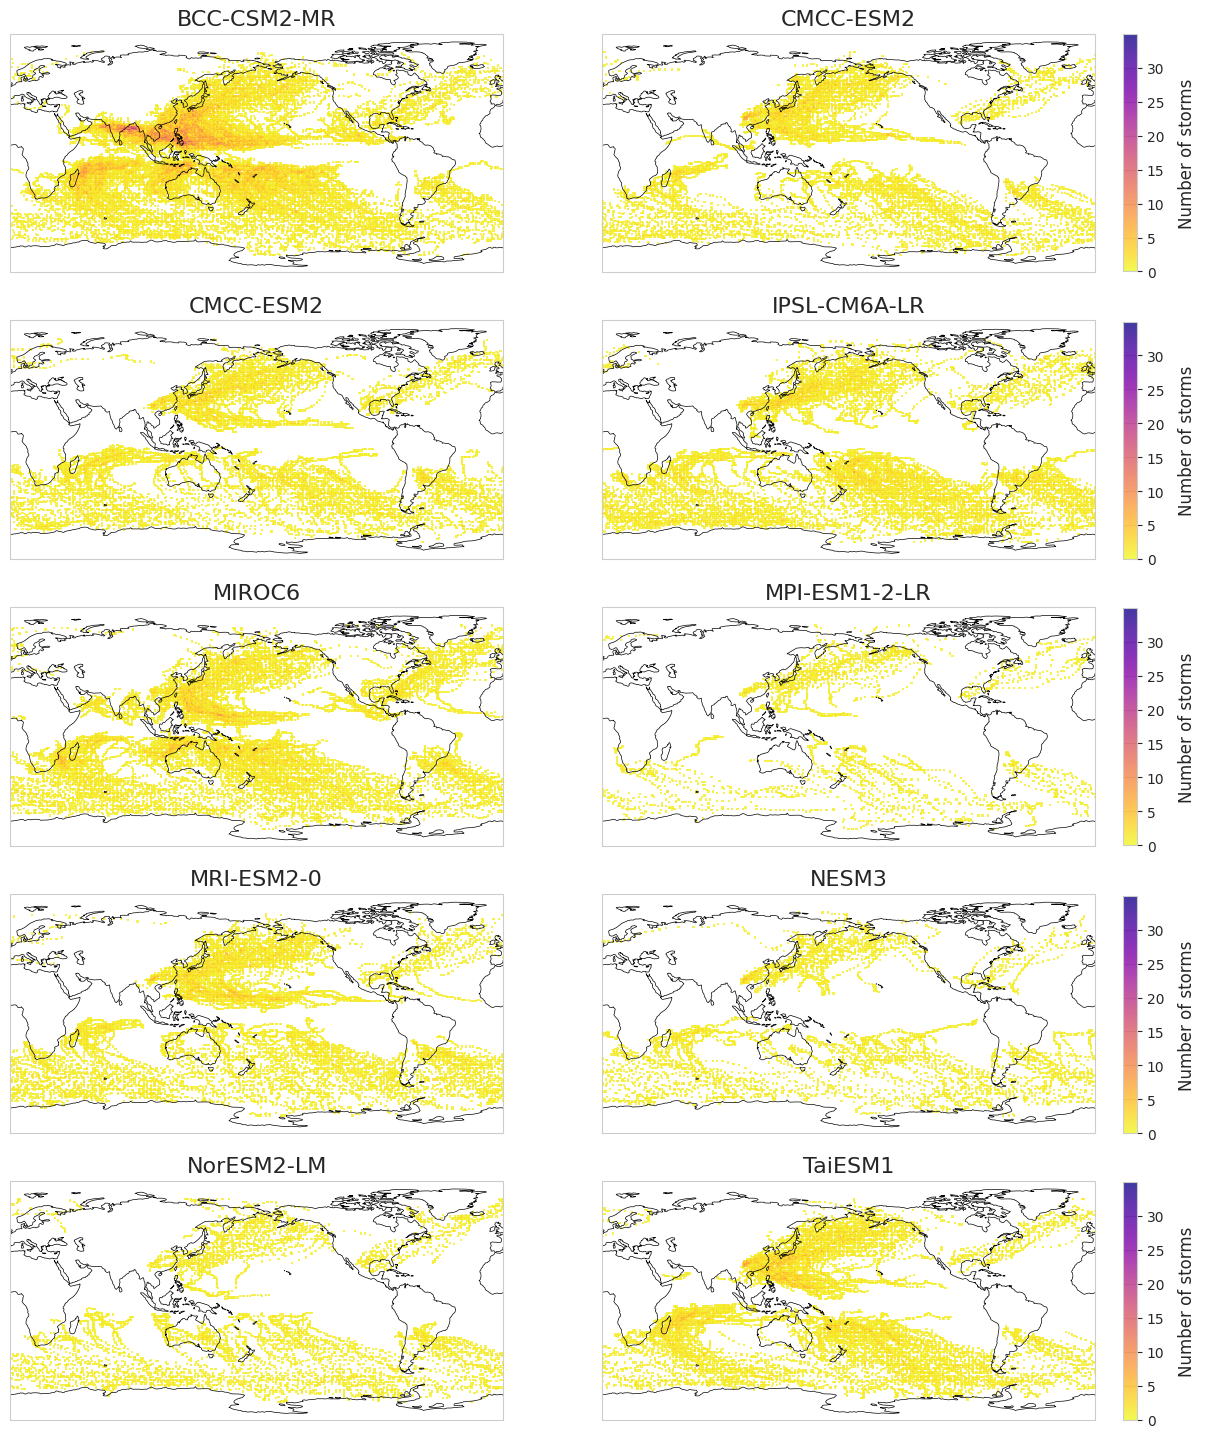

In [8]:
sns.set_style("whitegrid")  # You can change the style to your preference
fig, axes = plt.subplots(5, 2, figsize=(14, 18),gridspec_kw={'width_ratios': [1, 1]},subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})
# titles = ['Mean Sea level pressure (hPa)', 'U 850 hPa ($ms^{-1}$)', 'V 850 hPa ($ms^{-1}$)', 'Wind shear', 'Latitude (degrees North)', 'Longitude (degrees East)']
# labels = ['a.','b.','c.','d.','e.','f.']
['BCC-CSM2-MR','CMCC-ESM2','EC-Earth3','IPSL-CM6A-LR','MIROC6','MPI-ESM1-2-LR','MRI-ESM2-0','NESM3','NorESM2-LM','TaiESM1']
vmax = 35 
im = axes[0,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(bcc_hist_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[0,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(bcc_hist_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[0,0].set_title('BCC-CSM2-MR',fontsize=16)

axes[0,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(cmcc_hist_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[0,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(cmcc_hist_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[0,1].set_title('CMCC-ESM2',fontsize=16)

axes[1,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(ecearth_hist_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[1,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(ecearth_hist_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[1,0].set_title('CMCC-ESM2',fontsize=16)

axes[1,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(ipsl_hist_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[1,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(ipsl_hist_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[1,1].set_title('IPSL-CM6A-LR',fontsize=16)

axes[2,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(miroc_hist_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[2,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(miroc_hist_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[2,0].set_title('MIROC6',fontsize=16)

axes[2,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(mpi_hist_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[2,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(mpi_hist_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[2,1].set_title('MPI-ESM1-2-LR',fontsize=16)

axes[3,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(mri_hist_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[3,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(mri_hist_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[3,0].set_title('MRI-ESM2-0',fontsize=16)

axes[3,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(nesm_hist_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[3,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(nesm_hist_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[3,1].set_title('NESM3',fontsize=16)

axes[4,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(noresm_hist_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[4,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(noresm_hist_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[4,0].set_title('NorESM2-LM',fontsize=16)

axes[4,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(taiesm_hist_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[4,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(taiesm_hist_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[4,1].set_title('TaiESM1',fontsize=16)


for ax in [axes[0,0],axes[0,1],axes[1,0],axes[1,1],axes[2,0],axes[2,1],axes[3,0],axes[3,1],axes[4,0],axes[4,1]]:
    ax.add_feature(cfeature.COASTLINE,linewidth=0.5)   
    ax.set_aspect('auto', adjustable=None)
    ax.set_global()

cbar_ax = fig.add_axes([0.92, 0.7478, 0.01, 0.132])
cb = fig.colorbar(im, cax=cbar_ax,shrink=0.005,ticks=range(0,35,5)).set_label(label='Number of storms',size=12, labelpad=10)
cbar_ax = fig.add_axes([0.92, 0.588, 0.01, 0.132])
cb = fig.colorbar(im, cax=cbar_ax,shrink=0.005,ticks=range(0,35,5)).set_label(label='Number of storms',size=12, labelpad=10)
cbar_ax = fig.add_axes([0.92, 0.429, 0.01, 0.132])
cb = fig.colorbar(im, cax=cbar_ax,shrink=0.005,ticks=range(0,35,5)).set_label(label='Number of storms',size=12, labelpad=10)
cbar_ax = fig.add_axes([0.92, 0.269, 0.01, 0.132])
cb = fig.colorbar(im, cax=cbar_ax,shrink=0.005,ticks=range(0,35,5)).set_label(label='Number of storms',size=12, labelpad=10)
cbar_ax = fig.add_axes([0.92, 0.11, 0.01, 0.132])
cb = fig.colorbar(im, cax=cbar_ax,shrink=0.005,ticks=range(0,35,5)).set_label(label='Number of storms',size=12, labelpad=10)

plt.savefig('cmip6_track_density.png',bbox_inches='tight',dpi=300)


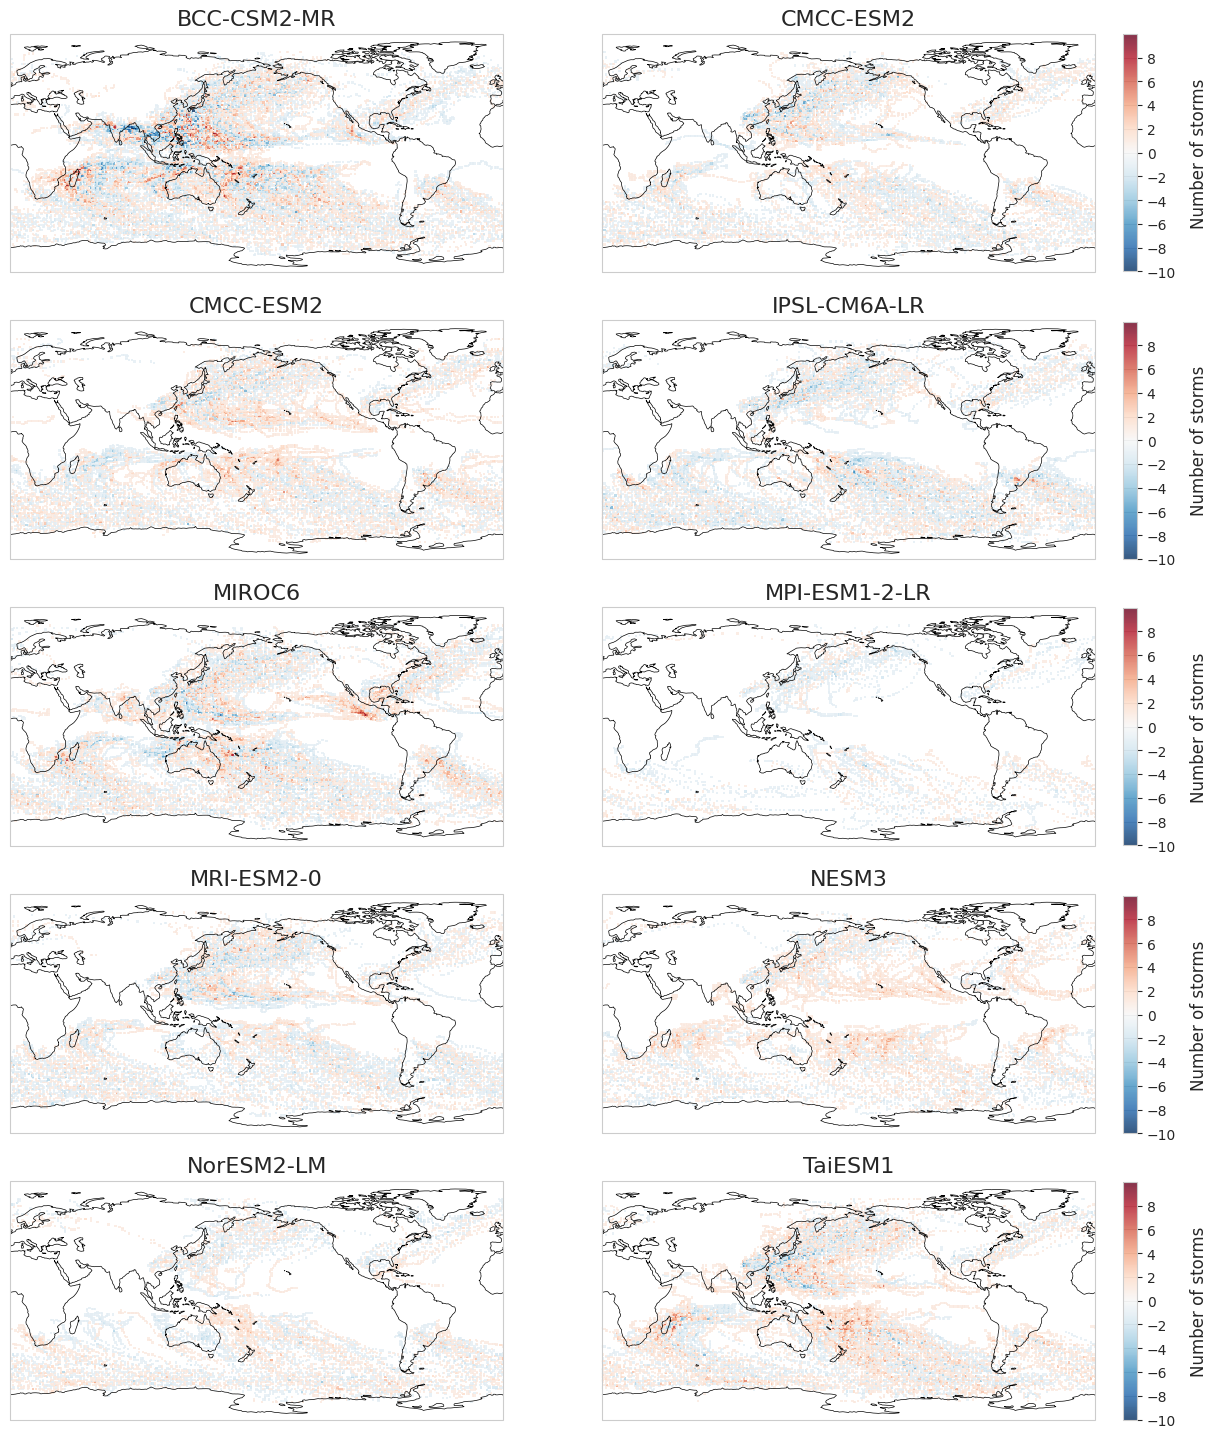

In [9]:
sns.set_style("whitegrid")  # You can change the style to your preference
fig, axes = plt.subplots(5, 2, figsize=(14, 18),gridspec_kw={'width_ratios': [1, 1]},subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})
# titles = ['Mean Sea level pressure (hPa)', 'U 850 hPa ($ms^{-1}$)', 'V 850 hPa ($ms^{-1}$)', 'Wind shear', 'Latitude (degrees North)', 'Longitude (degrees East)']
# labels = ['a.','b.','c.','d.','e.','f.']
['CMCC-CM2-VHR4','EC-Earth3P-HR','HadGEM3-GC31-HM','MPI-ESM1-2-HR']
cmap = 'RdBu_r'
vmin = -10
vmax = 10

im = axes[0,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(bcc_ssp585_masked_density_nh - bcc_hist_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap=cmap,vmin=vmin,vmax=vmax)
axes[0,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(bcc_ssp585_masked_density_sh - bcc_hist_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap=cmap,vmin=vmin,vmax=vmax)
axes[0,0].set_title('BCC-CSM2-MR',fontsize=16)

axes[0,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(cmcc_ssp585_masked_density_nh - cmcc_hist_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap=cmap,vmin=vmin,vmax=vmax)
axes[0,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(cmcc_ssp585_masked_density_sh - cmcc_hist_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap=cmap,vmin=vmin,vmax=vmax)
axes[0,1].set_title('CMCC-ESM2',fontsize=16)

axes[1,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(ecearth_ssp585_masked_density_nh - ecearth_hist_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap=cmap,vmin=vmin,vmax=vmax)
axes[1,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(ecearth_ssp585_masked_density_sh - ecearth_hist_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap=cmap,vmin=vmin,vmax=vmax)
axes[1,0].set_title('CMCC-ESM2',fontsize=16)

axes[1,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(ipsl_ssp585_masked_density_nh - ipsl_hist_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap=cmap,vmin=vmin,vmax=vmax)
axes[1,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(ipsl_ssp585_masked_density_sh - ipsl_hist_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap=cmap,vmin=vmin,vmax=vmax)
axes[1,1].set_title('IPSL-CM6A-LR',fontsize=16)

axes[2,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(miroc_ssp585_masked_density_nh - miroc_hist_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap=cmap,vmin=vmin,vmax=vmax)
axes[2,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(miroc_ssp585_masked_density_sh - miroc_hist_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap=cmap,vmin=vmin,vmax=vmax)
axes[2,0].set_title('MIROC6',fontsize=16)

axes[2,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(mpi_ssp585_masked_density_nh - mpi_hist_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap=cmap,vmin=vmin,vmax=vmax)
axes[2,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(mpi_ssp585_masked_density_sh - mpi_hist_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap=cmap,vmin=vmin,vmax=vmax)
axes[2,1].set_title('MPI-ESM1-2-LR',fontsize=16)

axes[3,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(mri_ssp585_masked_density_nh - mri_hist_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap=cmap,vmin=vmin,vmax=vmax)
axes[3,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(mri_ssp585_masked_density_sh - mri_hist_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap=cmap,vmin=vmin,vmax=vmax)
axes[3,0].set_title('MRI-ESM2-0',fontsize=16)

axes[3,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(nesm_ssp585_masked_density_nh - nesm_hist_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap=cmap,vmin=vmin,vmax=vmax)
axes[3,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(nesm_ssp585_masked_density_sh - nesm_hist_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap=cmap,vmin=vmin,vmax=vmax)
axes[3,1].set_title('NESM3',fontsize=16)

axes[4,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(noresm_ssp585_masked_density_nh - noresm_hist_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap=cmap,vmin=vmin,vmax=vmax)
axes[4,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(noresm_ssp585_masked_density_sh - noresm_hist_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap=cmap,vmin=vmin,vmax=vmax)
axes[4,0].set_title('NorESM2-LM',fontsize=16)

axes[4,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(taiesm_ssp585_masked_density_nh - taiesm_hist_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap=cmap,vmin=vmin,vmax=vmax)
axes[4,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(taiesm_ssp585_masked_density_sh - taiesm_hist_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap=cmap,vmin=vmin,vmax=vmax)
axes[4,1].set_title('TaiESM1',fontsize=16)

for ax in [axes[0,0],axes[0,1],axes[1,0],axes[1,1],axes[2,0],axes[2,1],axes[3,0],axes[3,1],axes[4,0],axes[4,1]]:
    ax.add_feature(cfeature.COASTLINE,linewidth=0.5)   
    ax.set_aspect('auto', adjustable=None)
    ax.set_global()


# divider = make_axes_locatable(axes[0,1])
# cax1 = divider.append_axes("right", size="5%", pad=0.05)
# fig.colorbar(im, cax=cax1)
# add colourbar




cbar_ax = fig.add_axes([0.92, 0.7478, 0.01, 0.132])
cb = fig.colorbar(im, cax=cbar_ax,shrink=0.005,ticks=range(-10,10,2)).set_label(label='Number of storms',size=12, labelpad=10)
cbar_ax = fig.add_axes([0.92, 0.429, 0.01, 0.132])
cb = fig.colorbar(im, cax=cbar_ax,shrink=0.005,ticks=range(-10,10,2)).set_label(label='Number of storms',size=12, labelpad=10)
cbar_ax = fig.add_axes([0.92, 0.269, 0.01, 0.132])
cb = fig.colorbar(im, cax=cbar_ax,shrink=0.005,ticks=range(-10,10,2)).set_label(label='Number of storms',size=12, labelpad=10)
cbar_ax = fig.add_axes([0.92, 0.11, 0.01, 0.132])
cb = fig.colorbar(im, cax=cbar_ax,shrink=0.005,ticks=range(-10,10,2)).set_label(label='Number of storms',size=12, labelpad=10)

cbar_ax = fig.add_axes([0.92, 0.588, 0.01, 0.132])
cb = fig.colorbar(im, cax=cbar_ax,shrink=0.005,ticks=range(-10,10,2)).set_label(label='Number of storms',size=12, labelpad=10)

plt.savefig('cmip6_track_density_anomaly.png',bbox_inches='tight',dpi=300)


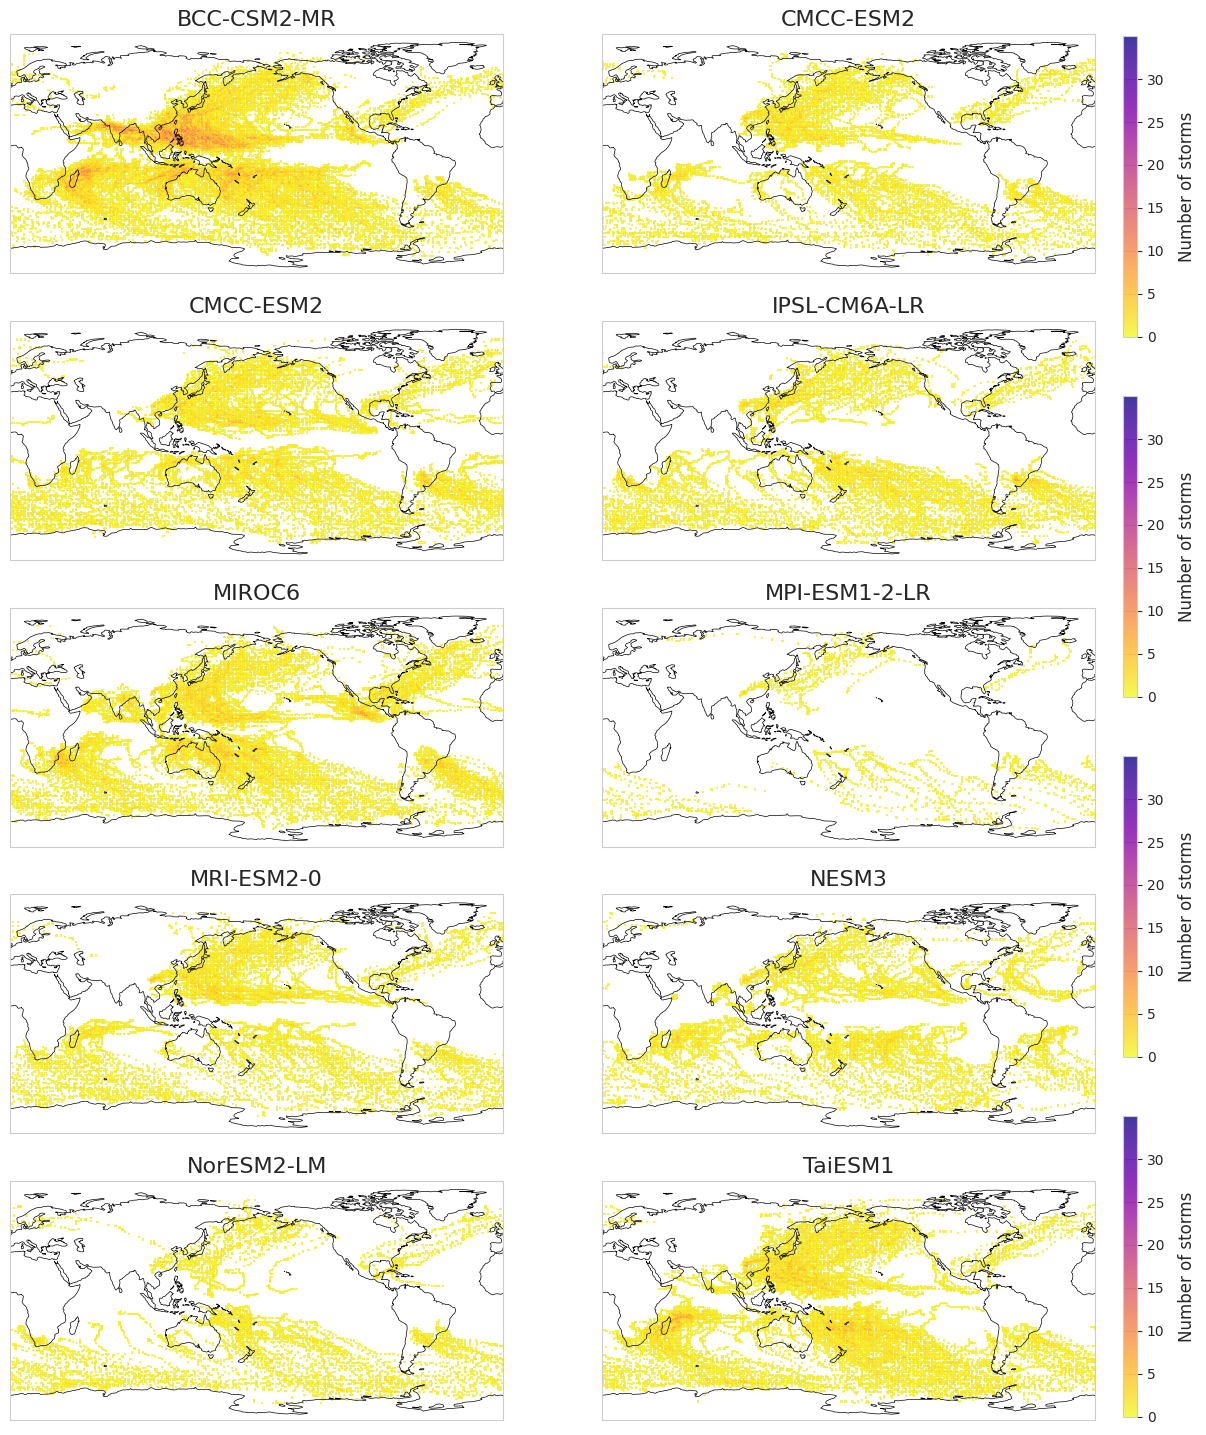

In [10]:
sns.set_style("whitegrid")  # You can change the style to your preference
fig, axes = plt.subplots(5, 2, figsize=(14, 18),gridspec_kw={'width_ratios': [1, 1]},subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})
# titles = ['Mean Sea level pressure (hPa)', 'U 850 hPa ($ms^{-1}$)', 'V 850 hPa ($ms^{-1}$)', 'Wind shear', 'Latitude (degrees North)', 'Longitude (degrees East)']
# labels = ['a.','b.','c.','d.','e.','f.']
['BCC-CSM2-MR','CMCC-ESM2','EC-Earth3','IPSL-CM6A-LR','MIROC6','MPI-ESM1-2-LR','MRI-ESM2-0','NESM3','NorESM2-LM','TaiESM1']
vmax = 35 
im = axes[0,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(bcc_ssp585_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[0,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(bcc_ssp585_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[0,0].set_title('BCC-CSM2-MR',fontsize=16)

axes[0,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(cmcc_ssp585_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[0,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(cmcc_ssp585_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[0,1].set_title('CMCC-ESM2',fontsize=16)

axes[1,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(ecearth_ssp585_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[1,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(ecearth_ssp585_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[1,0].set_title('CMCC-ESM2',fontsize=16)

axes[1,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(ipsl_ssp585_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[1,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(ipsl_ssp585_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[1,1].set_title('IPSL-CM6A-LR',fontsize=16)

axes[2,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(miroc_ssp585_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[2,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(miroc_ssp585_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[2,0].set_title('MIROC6',fontsize=16)

axes[2,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(mpi_ssp585_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[2,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(mpi_ssp585_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[2,1].set_title('MPI-ESM1-2-LR',fontsize=16)

axes[3,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(mri_ssp585_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[3,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(mri_ssp585_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[3,0].set_title('MRI-ESM2-0',fontsize=16)

axes[3,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(nesm_ssp585_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[3,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(nesm_ssp585_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[3,1].set_title('NESM3',fontsize=16)

axes[4,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(noresm_ssp585_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[4,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(noresm_ssp585_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[4,0].set_title('NorESM2-LM',fontsize=16)

axes[4,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(taiesm_ssp585_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[4,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(taiesm_ssp585_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[4,1].set_title('TaiESM1',fontsize=16)


for ax in [axes[0,0],axes[0,1],axes[1,0],axes[1,1],axes[2,0],axes[2,1],axes[3,0],axes[3,1],axes[4,0],axes[4,1]]:
    ax.add_feature(cfeature.COASTLINE,linewidth=0.5)   
    ax.set_aspect('auto', adjustable=None)
    ax.set_global()

cbar_ax = fig.add_axes([0.92, 0.712, 0.01, 0.167])
cb = fig.colorbar(im, cax=cbar_ax,shrink=0.005,ticks=range(0,35,5)).set_label(label='Number of storms',size=12, labelpad=10)
cbar_ax = fig.add_axes([0.92, 0.512, 0.01, 0.167])
cb = fig.colorbar(im, cax=cbar_ax,shrink=0.005,ticks=range(0,35,5)).set_label(label='Number of storms',size=12, labelpad=10)
cbar_ax = fig.add_axes([0.92, 0.312, 0.01, 0.167])
cb = fig.colorbar(im, cax=cbar_ax,shrink=0.005,ticks=range(0,35,5)).set_label(label='Number of storms',size=12, labelpad=10)
cbar_ax = fig.add_axes([0.92, 0.112, 0.01, 0.167])
cb = fig.colorbar(im, cax=cbar_ax,shrink=0.005,ticks=range(0,35,5)).set_label(label='Number of storms',size=12, labelpad=10)

plt.savefig('cmip6_track_ssp585_density.png',bbox_inches='tight',dpi=300)
